In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gen_x(w, t):
    x = ((w * t) % (2 * np.pi))
    return x

In [3]:
def sample_x(w, Fs, tfinal):
    t = np.arange(0,tfinal,1/Fs)
    xs = [gen_x(w,time) for time in t]
    xs = np.array(xs)
    n = np.arange(t.size)
    return np.column_stack((n, xs))

In [4]:
def plot_x(xn, s = "plot"):
    plt.plot(xn[:,0],xn[:,1],'o-')
    plt.xlabel('n')
    plt.ylabel('theta[n]')
    plt.title(s)
    plt.show()

In [5]:
def plot_x2(xn, y, s = "plot"):
    plt.plot(xn[:,0], xn[:,1],'yo-',label='true')
    plt.plot(xn[:,0], y,'go',label='estimated')
    plt.xlabel('n')
    plt.ylabel('theta[n]')
    plt.title(s)
    plt.legend()
    plt.show()

In [6]:
def Poly_Regression(xn_train, xn_test, M):
    
    n_train = [[(i/128)**n for n in range(M+1)] for i in xn_train[:,0]]
    n_test = [[(i/128)**n for n in range(M+1)] for i in xn_test[:,0]]
    
    n_train = np.matrix(n_train)
    n_test = np.matrix(n_test)
    
    W = ((n_train.T * n_train)**-1) * n_train.T * (np.matrix(xn_train[:,1]).T)

    plot_x2(xn_train, n_train*W, s = "LS; train data; M={}".format(M))
    plot_x2(xn_test, n_test*W, s = "LS; test data; M={}".format(M))

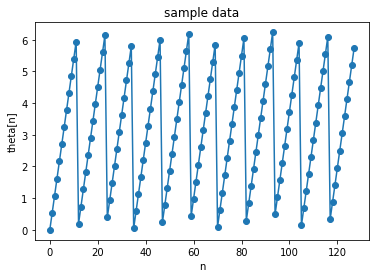

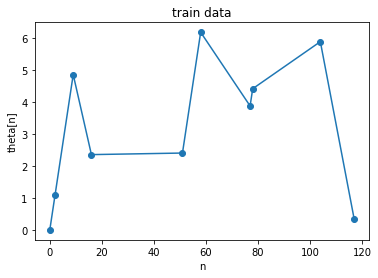

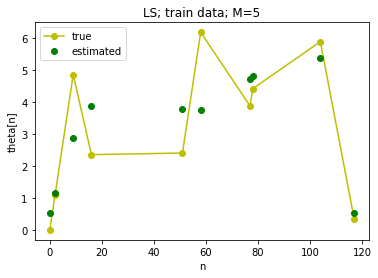

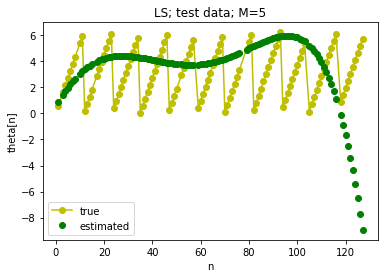

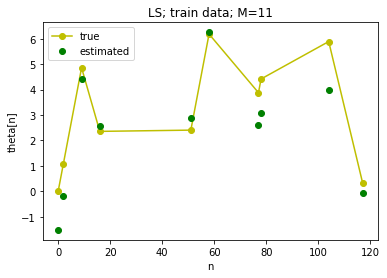

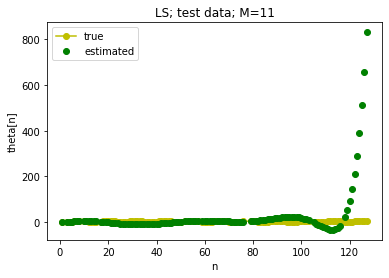

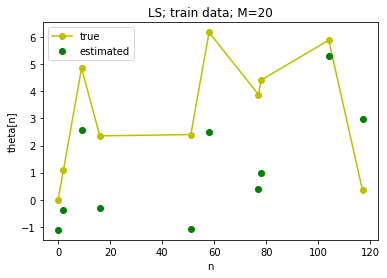

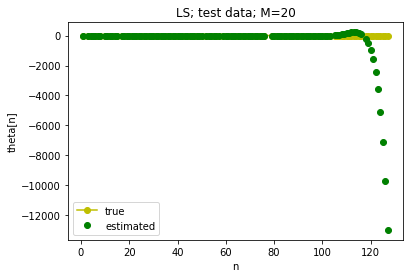

In [7]:
if __name__=="__main__":
    xn = sample_x(2*np.pi*11, 128, 1)
    plot_x(xn, s="sample data")
    np.random.seed(11)
    np.random.shuffle(xn)
    xn_train = xn[0:10]
    xn_test = xn[10:]
    xn_train = xn_train[xn_train[:,0].argsort()]
    xn_test = xn_test[xn_test[:,0].argsort()]
    plot_x(xn_train, s="train data")
    Poly_Regression(xn_train,xn_test,5)
    Poly_Regression(xn_train,xn_test,11)
    Poly_Regression(xn_train,xn_test,20)   